# MNIST: Basic Implementation
A simple version (Softmax)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import matplotlib.pyplot as plt

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
# we can create custom dataset classes to encapsulate data access
# the tutorial promised to teach us how to do this later
mnist = input_data.read_data_sets("data/MNIST/",one_hot=True)

In [8]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [16]:
single_image = mnist.train.images[4]
single_image.shape

(784,)

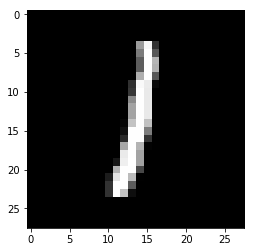

In [17]:
plt.imshow(single_image.reshape([28,28]),cmap='gist_gray')

In [20]:
# the MNIST dataset is already pre-normalized
print(single_image.min())
print(single_image.max())

0.0
1.0


In [31]:
# step 1: declare the placeholders
x = tf.placeholder(tf.float32,shape=[None,28*28])
y_true = tf.placeholder(tf.float32,[None,10])

In [32]:
# step 2: declare the variables
W = tf.Variable(tf.random_normal([28*28,10])) #the number of weights = input dimensions x label dimension
b = tf.Variable(tf.random_normal([10]))

In [33]:
# step 3: formulate the graph
y = tf.matmul(x,W) + b

In [35]:
# step 4: choose your loss function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

In [36]:
# step 5: choose your optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [46]:
# step 6: run with session
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100) # custom datasets have convenience methods to get mini batches
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
      
    # evaluate the model's accuracy
    # argmax = picks the label with the highest probability
    correct_prediction = tf.equal(tf.arg_max(y,1),tf.arg_max(y_true,1))

    # cast True = 1.0, False = 0.0 and find the average to determine the accuracy 
    acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.8811
